![https://raw.githubusercontent.com/marciolws/Curso_EBAC_Cientista_de_Dados/refs/heads/main/EBAC-media-utils/logo/ebac_logo-data_science.png](https://raw.githubusercontent.com/marciolws/Curso_EBAC_Cientista_de_Dados/refs/heads/main/EBAC-media-utils/logo/ebac_logo-data_science.png)

---

<!-- # **Profissão: Cientista de Dados** -->
### **Módulo 27** | PCA | Exercício II

**Aluno:** [Marcio da Silva](https://www.linkedin.com/in/marcio-d-silva/)<br>
**Data:** 11 de outubro de 2024.

---


# Classificação de Atividade Humana com PCA

Vamos trabalhar com a base da demonstração feita em aula, mas vamos explorar um pouco melhor como é o desempenho da árvore variando o número de componentes principais.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.tree import DecisionTreeClassifier

from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
filename_features = "/Users/marciolewis/Library/Mobile Documents/com~apple~CloudDocs/EBAC/EBAC_EXERCICIOS/Módulo 27 - PCA/UCI HAR Dataset/features.txt"
filename_labels = "/Users/marciolewis/Library/Mobile Documents/com~apple~CloudDocs/EBAC/EBAC_EXERCICIOS/Módulo 27 - PCA/UCI HAR Dataset/activity_labels.txt"

filename_subtrain = "/Users/marciolewis/Library/Mobile Documents/com~apple~CloudDocs/EBAC/EBAC_EXERCICIOS/Módulo 27 - PCA/UCI HAR Dataset/train/subject_train.txt"
filename_xtrain = "/Users/marciolewis/Library/Mobile Documents/com~apple~CloudDocs/EBAC/EBAC_EXERCICIOS/Módulo 27 - PCA/UCI HAR Dataset/train/X_train.txt"
filename_ytrain = "/Users/marciolewis/Library/Mobile Documents/com~apple~CloudDocs/EBAC/EBAC_EXERCICIOS/Módulo 27 - PCA/UCI HAR Dataset/train/y_train.txt"

filename_subtest = "/Users/marciolewis/Library/Mobile Documents/com~apple~CloudDocs/EBAC/EBAC_EXERCICIOS/Módulo 27 - PCA/UCI HAR Dataset/test/subject_test.txt"
ffilename_xtest = "/Users/marciolewis/Library/Mobile Documents/com~apple~CloudDocs/EBAC/EBAC_EXERCICIOS/Módulo 27 - PCA/UCI HAR Dataset/test/X_test.txt"
filename_ytest = "/Users/marciolewis/Library/Mobile Documents/com~apple~CloudDocs/EBAC/EBAC_EXERCICIOS/Módulo 27 - PCA/UCI HAR Dataset/test/y_test.txt"

features = pd.read_csv(filename_features, header=None, names=['nome_var'], sep="#").squeeze("columns")
labels   = pd.read_csv(filename_labels, delim_whitespace=True, header=None, names=['cod_label', 'label'])

subject_train = pd.read_csv(filename_subtrain, header=None, names=['subject_id']).squeeze("columns")
X_train       = pd.read_csv(filename_xtrain, delim_whitespace=True, header=None, names=features.tolist())
y_train       = pd.read_csv(filename_ytrain, header=None, names=['cod_label'])

subject_test = pd.read_csv(filename_subtest, header=None, names=['subject_id']).squeeze("columns")
X_test       = pd.read_csv(ffilename_xtest, delim_whitespace=True, header=None, names=features.tolist())
y_test       = pd.read_csv(filename_ytest, header=None, names=['cod_label'])

/var/folders/35/wxry5fy93jq958pscyfmnt5m0000gn/T/ipykernel_19182/2376891526.py:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  labels   = pd.read_csv(filename_labels, delim_whitespace=True, header=None, names=['cod_label', 'label'])
/var/folders/35/wxry5fy93jq958pscyfmnt5m0000gn/T/ipykernel_19182/2376891526.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train       = pd.read_csv(filename_xtrain, delim_whitespace=True, header=None, names=features.tolist())
/var/folders/35/wxry5fy93jq958pscyfmnt5m0000gn/T/ipykernel_19182/2376891526.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test       = pd.read_csv(ffilename_xtest, delim_whitespace=True, header=None, names=features.tolist())


In [3]:
# Visão geral estatística das colunas numéricas do DataFrame X_train.
X_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
1 tBodyAcc-mean()-X,7352.0,0.274488,0.070261,-1.000000,0.262975,0.277193,0.288461,1.000000
2 tBodyAcc-mean()-Y,7352.0,-0.017695,0.040811,-1.000000,-0.024863,-0.017219,-0.010783,1.000000
3 tBodyAcc-mean()-Z,7352.0,-0.109141,0.056635,-1.000000,-0.120993,-0.108676,-0.097794,1.000000
4 tBodyAcc-std()-X,7352.0,-0.605438,0.448734,-1.000000,-0.992754,-0.946196,-0.242813,1.000000
5 tBodyAcc-std()-Y,7352.0,-0.510938,0.502645,-0.999873,-0.978129,-0.851897,-0.034231,0.916238
...,...,...,...,...,...,...,...,...
"557 angle(tBodyGyroMean,gravityMean)",7352.0,0.008726,0.608303,-1.000000,-0.482273,0.008735,0.506187,0.998702
"558 angle(tBodyGyroJerkMean,gravityMean)",7352.0,-0.005981,0.477975,-1.000000,-0.376341,-0.000368,0.359368,0.996078
"559 angle(X,gravityMean)",7352.0,-0.489547,0.511807,-1.000000,-0.812065,-0.709417,-0.509079,1.000000
"560 angle(Y,gravityMean)",7352.0,0.058593,0.297480,-1.000000,-0.017885,0.182071,0.248353,0.478157


## PCA com variáveis padronizadas

Reflexão sobre a escala das variáveis:

**Variáveis em métricas muito diferentes** podem interferir na análise de componentes principais. Lembra que variância é informação pra nós? Pois bem, tipicamente se há uma variável monetária como salário, vai ter uma ordem de variabilidade bem maior que número de filhos, tempo de emprego ou qualquer variável dummy. Assim, as variáveis de maior variância tendem a "dominar" a análise. Nesses casos é comum usar a padronização das variáveis.

Faça duas análises de componentes principais para a base do HAR - com e sem padronização e compare:

- A variância explicada por componente
- A variância explicada acumulada por componente
- A variância percentual por componente
- A variância percentual acumulada por componente
- Quantas componentes você escolheria, em cada caso para explicar 90% da variância?

In [4]:
%%time

def padroniza(s):
    if s.std() > 0:
        s = (s - s.mean())/s.std()
    return s

X_train_pad = pd.DataFrame(X_train).apply(padroniza, axis=0)
X_test_pad = pd.DataFrame(X_test).apply(padroniza, axis=0)

CPU times: user 646 ms, sys: 35.4 ms, total: 682 ms
Wall time: 748 ms


In [5]:
# Visão geral estatística das colunas numéricas do DataFrame X_train.
X_train_pad.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
1 tBodyAcc-mean()-X,7352.0,-3.160330e-16,1.0,-18.139254,-0.163858,0.038502,0.198872,10.325905
2 tBodyAcc-mean()-Y,7352.0,4.639017e-17,1.0,-24.069884,-0.175631,0.011671,0.169379,24.937083
3 tBodyAcc-mean()-Z,7352.0,8.794803e-17,1.0,-15.729779,-0.209266,0.008206,0.200360,19.583956
4 tBodyAcc-std()-X,7352.0,-1.507680e-16,1.0,-0.879276,-0.863128,-0.759376,0.808108,3.577703
5 tBodyAcc-std()-Y,7352.0,7.731695e-18,1.0,-0.972726,-0.929466,-0.678330,0.948397,2.839333
...,...,...,...,...,...,...,...,...
"557 angle(tBodyGyroMean,gravityMean)",7352.0,-1.618824e-17,1.0,-1.658262,-0.807162,0.000015,0.817786,1.627440
"558 angle(tBodyGyroJerkMean,gravityMean)",7352.0,3.672555e-17,1.0,-2.079646,-0.774853,0.011743,0.764368,2.096467
"559 angle(X,gravityMean)",7352.0,8.891449e-17,1.0,-0.997354,-0.630155,-0.429596,-0.038163,2.910370
"560 angle(Y,gravityMean)",7352.0,-1.159754e-17,1.0,-3.558535,-0.257085,0.415080,0.637890,1.410395


#### PCA para base de treinamento sem padronização.

In [6]:
%%time

#Cria uma instância do objeto PCA (Análise de Componentes Principais).
pca = PCA()

#Ajusta o modelo PCA aos dados para obter os componentes principais.
princomp = pca.fit(X_train)

#Obtem os numeros de colunas dos dados do treinamento.
componentes = princomp.transform(X_train)

#Numeros de colunas do dados.
n_componentes = X_train.shape[1]

#Gera um DataFrame com os componentes principais nomeados como "CP1", "CP2", etc.
nomes_pca =['CP' + str(x+1) for x in list(range(n_componentes))]

#Maneira prática de organizar os dados resultantes da PCA em um formato fácil de manipular e analisar.
pd.DataFrame(data=componentes, columns=nomes_pca)


CPU times: user 473 ms, sys: 71.8 ms, total: 545 ms
Wall time: 212 ms


,CP1,CP2,CP3,CP4,CP5,CP6,CP7,CP8,CP9,CP10,...,CP552,CP553,CP554,CP555,CP556,CP557,CP558,CP559,CP560,CP561
0,-5.520280,0.290278,1.529929,-1.333242,1.425089,0.194708,0.577454,0.691490,-1.222865,-0.363414,...,6.860865e-09,-2.510260e-09,-4.362759e-10,-2.757417e-09,-5.938896e-09,-5.490981e-09,-5.462986e-10,-1.405195e-09,-2.735452e-09,5.901266e-09
1,-5.535350,0.082530,1.924804,-0.671273,0.671260,-0.735144,-0.616908,-0.771714,-0.615496,-0.895525,...,1.018269e-09,3.786402e-09,1.550303e-09,-6.249621e-10,8.674769e-10,6.389970e-10,-3.610857e-10,9.556864e-10,-5.364391e-09,-3.483722e-09
2,-5.474988,-0.287387,2.144642,-0.531806,0.207824,0.037772,0.057628,0.093917,-0.063147,-0.216898,...,4.295045e-10,1.849361e-09,-2.008464e-09,-8.805763e-10,3.266559e-09,5.631211e-09,-1.340239e-09,3.605780e-10,-9.758928e-10,-5.778633e-10
3,-5.677232,-0.897031,2.018220,-0.157125,0.759085,-1.079547,-0.267805,-0.731391,0.281296,0.466269,...,2.364920e-09,3.798283e-09,-6.394743e-11,-1.711301e-09,-5.250867e-09,-6.504870e-09,1.254418e-09,4.268463e-09,5.605998e-10,-3.146896e-09
4,-5.748749,-1.162952,2.139533,-0.207823,0.473090,-0.463035,-0.152227,-0.107509,0.289819,0.539206,...,8.516007e-10,-2.931111e-09,2.533869e-09,3.473278e-09,4.776187e-10,1.962759e-09,-1.639414e-09,3.142759e-09,-1.423564e-09,1.937428e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,6.253517,2.636767,-0.448229,-1.476516,-0.767298,0.268023,-1.348600,-0.463529,1.463389,0.210285,...,3.235050e-09,-2.829906e-09,-4.284492e-09,2.294089e-10,3.370676e-09,-3.387086e-09,-1.642916e-10,-1.183597e-09,-2.487312e-11,9.431877e-10
7348,5.782321,2.437814,-0.462731,-1.711345,-0.825446,0.403852,-1.257430,-0.319120,0.424317,-0.814650,...,1.749462e-09,6.914531e-10,-1.646143e-09,-1.400715e-09,-1.048617e-09,-1.595453e-09,4.220061e-09,-2.806978e-10,-2.330868e-09,1.612366e-09
7349,5.857505,3.081843,-0.671207,-2.253646,-0.494577,-0.391518,-1.000016,-0.162912,0.291533,1.248849,...,4.581775e-09,-3.493349e-09,1.502395e-09,3.644106e-09,-3.633089e-09,1.828235e-09,-1.781887e-09,1.265928e-09,2.597407e-09,-5.918540e-09
7350,5.421095,3.426430,-0.671243,-2.013981,-0.612601,-0.443119,-1.445597,-0.112817,0.813037,1.681171,...,-5.259377e-10,-5.396653e-10,1.102010e-09,-3.804723e-09,1.816241e-09,1.152578e-09,4.541032e-09,1.861421e-09,-1.671816e-09,-1.871829e-09


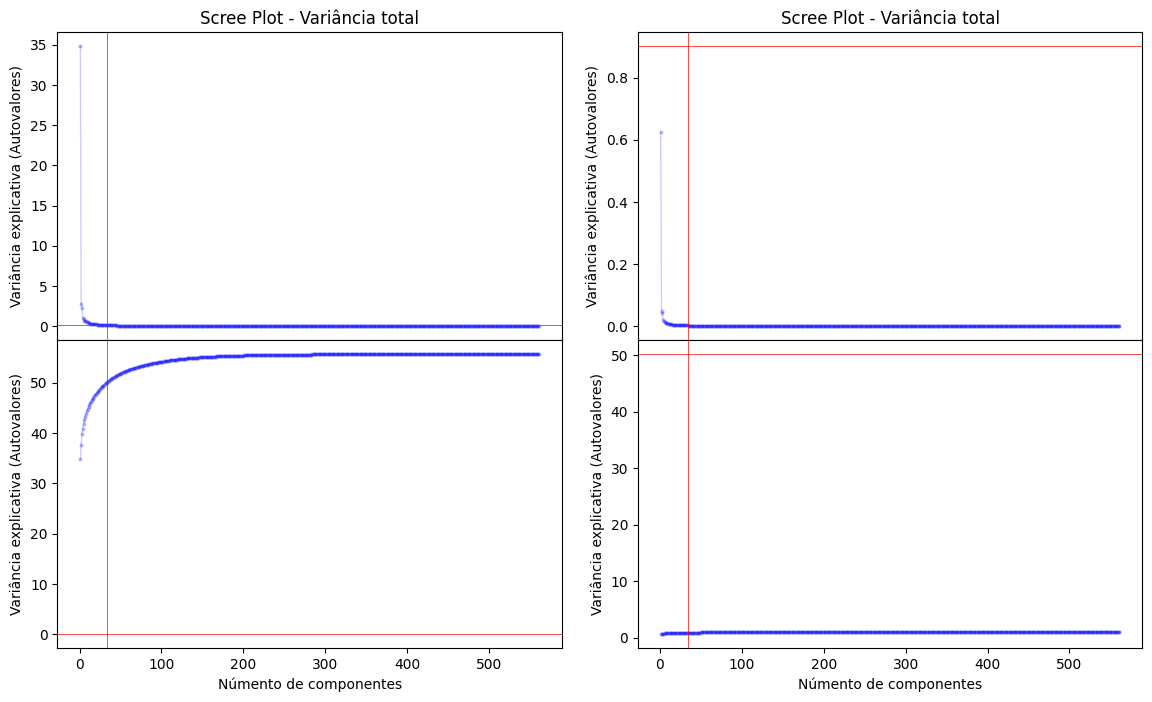

Explica 90% da variância sem a padronização das variáveis serão necessário 34 componentes.


In [7]:
#Critério usado: Variância explicativa.

#Cria uma imagem com 2 linhas e 2 colunas e ajusta os espaços.
fix, ax = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(14,8))
plt.subplots_adjust(hspace=0, wspace=.15)

#Definindo numero dos componentes pelo critério.
varexplicativa = .90 #Variãncia explicativa. 
ncomp_criterio = (princomp.explained_variance_ratio_.cumsum() < varexplicativa).sum() + 1

#Grafico de variância nominal por quantidade de componentes
num_componentes = np.arange(princomp.n_components_) + 1
ax[0, 0].plot(num_componentes, princomp.explained_variance_, 'o-', linewidth=1, color='blue', markersize=2, alpha=.2)
ax[0, 0].set_title('Scree Plot - Variância total')
ax[0, 0].set_xlabel('Númento de componentes')
ax[0, 0].set_ylabel('Variância explicativa (Autovalores)')

#Grafico de variância nominal por quantidade de componentes
ax[1, 0].plot(num_componentes, princomp.explained_variance_.cumsum(), 'o-', linewidth=1, color='blue', markersize=2, alpha=.2)
ax[1, 0].set_xlabel('Númento de componentes')
ax[1, 0].set_ylabel('Variância explicativa (Autovalores)')

#Grafico de variância percentual por quantidade de componentes
num_componentes = np.arange(princomp.n_components_) + 1
ax[0, 1].plot(num_componentes, princomp.explained_variance_ratio_, 'o-', linewidth=1, color='blue', markersize=2, alpha=.2)
ax[0, 1].set_title('Scree Plot - Variância total')
ax[0, 1].set_xlabel('Númento de componentes')
ax[0, 1].set_ylabel('Variância explicativa (Autovalores)')

#Grafico de variância percentual acumulada por quantidade de componentes
ax[1, 1].plot(num_componentes, princomp.explained_variance_ratio_.cumsum(), 'o-', linewidth=1, color='blue', markersize=2, alpha=.2)
ax[1, 1].set_xlabel('Númento de componentes')
ax[1, 1].set_ylabel('Variância explicativa (Autovalores)')

#Linhas verticais
ax[0, 0].axvline(x=ncomp_criterio, color='r', linestyle='-', linewidth=.5)
ax[1, 1].axvline(x=ncomp_criterio, color='r', linestyle='-', linewidth=.5)
ax[1, 0].axvline(x=ncomp_criterio, color='r', linestyle='-', linewidth=.5)
ax[0, 1].axvline(x=ncomp_criterio, color='r', linestyle='-', linewidth=.5)

#linhas horizontais.
ax[0, 0].axhline(y=princomp.explained_variance_[ncomp_criterio-1], color='r', linestyle='-', linewidth=.5)
ax[1, 1].axhline(y=princomp.explained_variance_.cumsum()[ncomp_criterio-1], color='r', linestyle='-', linewidth=.5)
ax[1, 0].axhline(y=princomp.explained_variance_ratio_[ncomp_criterio-1], color='r', linestyle='-', linewidth=.5)
ax[0, 1].axhline(y=princomp.explained_variance_ratio_.cumsum()[ncomp_criterio-1], color='r', linestyle='-', linewidth=.5)

plt.show()

print(f'Explica 90% da variância sem a padronização das variáveis serão necessário {ncomp_criterio} componentes.')

In [8]:
variancia = princomp.explained_variance_[ncomp_criterio-1]
variancia_acumulada = princomp.explained_variance_.cumsum()[ncomp_criterio-1]
pct_variancia = princomp.explained_variance_ratio_[ncomp_criterio-1]
pct_variancia_acumulada = princomp.explained_variance_ratio_.cumsum()[ncomp_criterio-1]

print(f'Número de componente:_____________________________{ncomp_criterio}')
print(f'Variância da última CP:___________________________{variancia:.2f}')
print(f'Variância acumulada da última CP:_________________{variancia_acumulada:.2f}')
print(f'Variância percentual da última CP:________________{100*pct_variancia:.2f}%')
print(f'Variância percentual acumulada da última CP:______{100*pct_variancia_acumulada:.2f}%')

Número de componente:_____________________________34
Variância da última CP:___________________________0.13
Variância acumulada da última CP:_________________50.15
Variância percentual da última CP:________________0.24%
Variância percentual acumulada da última CP:______90.09%


In [12]:
pca_raw = pd.DataFrame(data={'variancia': princomp.explained_variance_[:ncomp_criterio],
                          'variancia_acumulada': princomp.explained_variance_.cumsum()[:ncomp_criterio],
                          'pct_variancia': princomp.explained_variance_ratio_[:ncomp_criterio],
                          'pct_variancia_acumulada': princomp.explained_variance_ratio_.cumsum()[:ncomp_criterio]},
                          index=list(range(1, ncomp_criterio+1)))
pca_raw.index.name = 'CP'
pca_raw

,variancia,variancia_acumulada,pct_variancia,pct_variancia_acumulada
CP,,,,
1,34.823630,34.823630,0.625544,0.625544
2,2.735046,37.558677,0.049130,0.674675
3,2.294393,39.853070,0.041215,0.715889
4,1.043775,40.896845,0.018750,0.734639
5,0.943517,41.840362,0.016949,0.751587
6,0.708152,42.548514,0.012721,0.764308
7,0.655053,43.203567,0.011767,0.776075
8,0.595090,43.798657,0.010690,0.786765
9,0.539647,44.338304,0.009694,0.796459


#### Analise do PCA para base de treinamento **com** padronização.

In [14]:
%%time

#Instancia do PCA para realizar analises dos componentes peincipais.
pca_pad = PCA()

princomp_pad = pca_pad.fit(X_train_pad)

componentes_pad = princomp_pad.transform(X_train_pad)

n_componentes_pad = X_train_pad.shape[1]

nomes_pca_pad =['CP' + str(x+1) for x in list(range(n_componentes_pad))]

pd.DataFrame(data=componentes_pad, columns=nomes_pca_pad)


CPU times: user 422 ms, sys: 142 ms, total: 564 ms
Wall time: 237 ms


,CP1,CP2,CP3,CP4,CP5,CP6,CP7,CP8,CP9,CP10,...,CP552,CP553,CP554,CP555,CP556,CP557,CP558,CP559,CP560,CP561
0,-16.137446,2.151878,-3.144566,0.272446,-6.798476,-4.249105,2.936959,-4.905079,0.775462,3.627490,...,9.190185e-09,-5.572479e-09,-2.414850e-08,1.312442e-09,1.254899e-09,2.027128e-08,1.207665e-08,5.803061e-10,2.317931e-08,-5.225606e-10
1,-15.295154,1.387049,0.682175,-2.813486,-4.265880,-2.055523,0.011204,-1.845860,-0.492513,0.180162,...,1.091311e-08,2.366203e-08,-3.832553e-08,-2.467630e-08,-2.822558e-08,-2.158602e-08,6.723475e-09,3.374757e-08,7.872198e-09,1.759128e-08
2,-15.135989,2.473183,1.756521,-3.717722,-4.181273,-1.357425,0.072942,-1.388094,-0.539717,0.671666,...,-1.504791e-09,6.351760e-09,7.504048e-10,-5.181240e-09,4.609560e-09,-1.230372e-08,-1.749970e-08,-6.092018e-09,1.807859e-08,-7.404758e-09
3,-15.349840,3.915414,1.790201,-2.567347,-3.205621,-0.942880,0.530700,-1.832060,-1.071444,1.496887,...,-1.986131e-08,-1.471113e-08,-1.204073e-09,-1.730913e-08,-2.555475e-08,5.559795e-09,1.874937e-08,-1.813694e-08,-5.950671e-08,6.441241e-09
4,-15.543756,4.598424,2.188433,-2.897381,-3.079941,-1.061386,-1.048520,-0.816877,-0.600022,-1.118799,...,1.290151e-08,-8.055890e-09,-3.192358e-09,-1.867051e-08,-1.202628e-09,-2.031624e-08,-1.472184e-08,5.985463e-09,3.773351e-08,3.018721e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,15.464009,-12.535453,-1.999041,-3.457489,1.523091,-2.698944,-3.561009,2.418529,-0.383154,-1.308633,...,8.753256e-09,1.489586e-08,3.482277e-09,1.340925e-08,2.052380e-08,1.757567e-10,1.220317e-08,-5.619338e-09,1.096108e-09,-3.130823e-09
7348,14.221755,-10.252804,-2.377499,-2.802476,1.325223,-4.345821,-2.193817,0.032138,0.528893,-0.702462,...,-1.329979e-08,-1.927962e-08,2.386266e-08,6.636391e-09,1.255676e-08,1.165978e-08,7.469528e-09,-1.309701e-08,-1.420245e-08,-2.670441e-08
7349,14.332461,-12.259878,-4.025672,-3.849518,2.860295,-3.623803,-3.929374,-0.873103,0.746280,1.575419,...,2.403785e-08,-4.386844e-09,3.718051e-08,-8.555291e-09,8.314358e-09,-8.814199e-09,-2.409801e-08,3.233314e-08,-6.335957e-09,-3.870444e-09
7350,12.875143,-14.070299,-2.915863,-5.013085,3.937957,-2.137461,-5.390033,0.321283,0.916237,1.646259,...,1.283073e-08,-1.108985e-08,4.102158e-09,1.801674e-08,-2.316677e-08,2.249351e-08,-1.363572e-08,2.198074e-08,1.013283e-08,-1.018190e-08


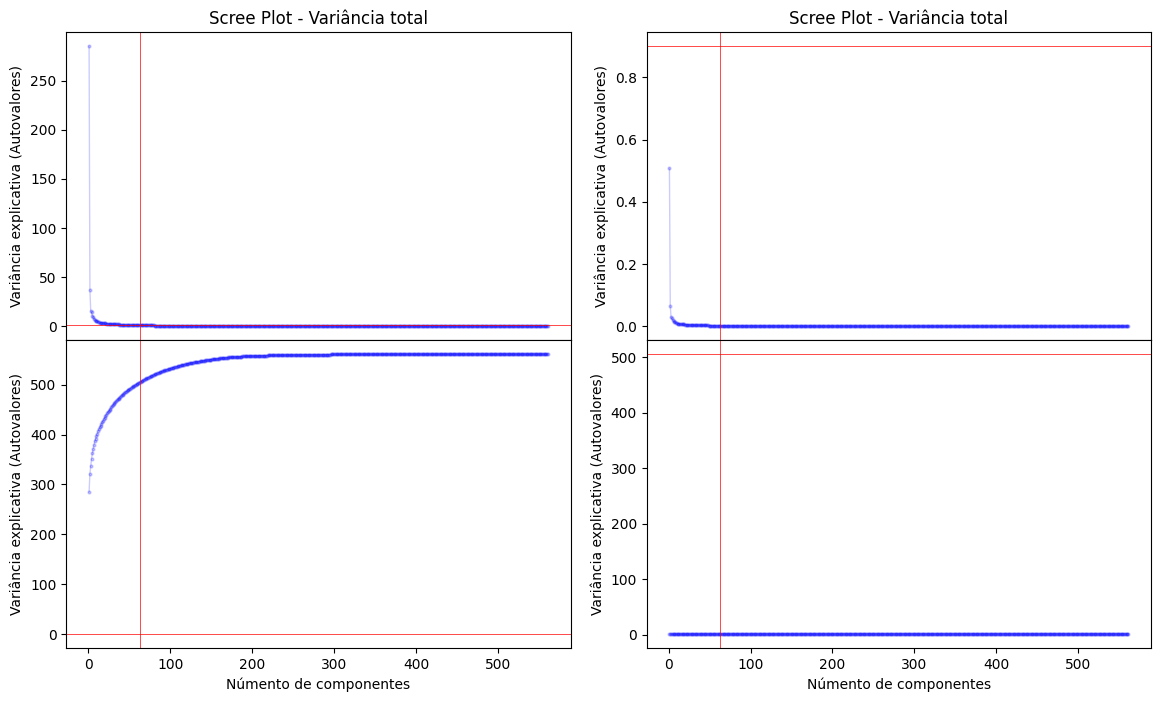

Explica 90% da variância sem a padronização das variáveis serão necessário 34 componentes.
Para o citério de autovalor > 1, serão necessárioas 61 componentes.


In [16]:
#Critério usado: Variância explicativa.

#Cria uma imagem com 2 linhas e 2 colunas e ajusta os espaços.
fix, ax = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(14,8))
plt.subplots_adjust(hspace=0, wspace=.15)

#Definindo numero dos componentes pelo critério.
varexplicativa = .90 #Variãncia explicativa. 
ncomp_criterio_pad = (princomp_pad.explained_variance_ratio_.cumsum() < varexplicativa).sum() + 1

#Grafico de variância nominal por quantidade de componentes
num_componentes_pad = np.arange(princomp_pad.n_components_) + 1
ax[0, 0].plot(num_componentes_pad, princomp_pad.explained_variance_, 'o-', linewidth=1, color='blue', markersize=2, alpha=.2)
ax[0, 0].set_title('Scree Plot - Variância total')
ax[0, 0].set_xlabel('Númento de componentes')
ax[0, 0].set_ylabel('Variância explicativa (Autovalores)')

#Grafico de variância nominal por quantidade de componentes
ax[1, 0].plot(num_componentes_pad, princomp_pad.explained_variance_.cumsum(), 'o-', linewidth=1, color='blue', markersize=2, alpha=.2)
ax[1, 0].set_xlabel('Númento de componentes')
ax[1, 0].set_ylabel('Variância explicativa (Autovalores)')

#Grafico de variância percentual por quantidade de componentes
num_componentes_pad = np.arange(princomp_pad.n_components_) + 1
ax[0, 1].plot(num_componentes, princomp_pad.explained_variance_ratio_, 'o-', linewidth=1, color='blue', markersize=2, alpha=.2)
ax[0, 1].set_title('Scree Plot - Variância total')
ax[0, 1].set_xlabel('Númento de componentes')
ax[0, 1].set_ylabel('Variância explicativa (Autovalores)')

#Grafico de variância percentual acumulada por quantidade de componentes
ax[1, 1].plot(num_componentes_pad, princomp_pad.explained_variance_ratio_.cumsum(), 'o-', linewidth=1, color='blue', markersize=2, alpha=.2)
ax[1, 1].set_xlabel('Númento de componentes')
ax[1, 1].set_ylabel('Variância explicativa (Autovalores)')

#Linhas verticais
ax[0, 0].axvline(x=ncomp_criterio_pad, color='r', linestyle='-', linewidth=.5)
ax[1, 1].axvline(x=ncomp_criterio_pad, color='r', linestyle='-', linewidth=.5)
ax[1, 0].axvline(x=ncomp_criterio_pad, color='r', linestyle='-', linewidth=.5)
ax[0, 1].axvline(x=ncomp_criterio_pad, color='r', linestyle='-', linewidth=.5)

#linhas horizontais.
ax[0, 0].axhline(y=princomp_pad.explained_variance_[ncomp_criterio_pad-1], color='r', linestyle='-', linewidth=.5)
ax[1, 1].axhline(y=princomp_pad.explained_variance_.cumsum()[ncomp_criterio_pad-1], color='r', linestyle='-', linewidth=.5)
ax[1, 0].axhline(y=princomp_pad.explained_variance_ratio_[ncomp_criterio_pad-1], color='r', linestyle='-', linewidth=.5)
ax[0, 1].axhline(y=princomp_pad.explained_variance_ratio_.cumsum()[ncomp_criterio_pad-1], color='r', linestyle='-', linewidth=.5)

plt.show()

print(f'Explica 90% da variância sem a padronização das variáveis serão necessário {ncomp_criterio} componentes.')

criterio_autovalor = (princomp_pad.explained_variance_ratio_ > 1 / princomp_pad.n_components_).sum()
print(f'Para o citério de autovalor > 1, serão necessárioas {criterio_autovalor} componentes.')

In [17]:
variancia = princomp_pad.explained_variance_[ncomp_criterio_pad-1]
variancia_acumulada = princomp_pad.explained_variance_.cumsum()[ncomp_criterio_pad-1]
pct_variancia = princomp_pad.explained_variance_ratio_[ncomp_criterio_pad-1]
pct_variancia_acumulada = princomp_pad.explained_variance_ratio_.cumsum()[ncomp_criterio_pad-1]

print(f'Número de componente:_____________________________{ncomp_criterio_pad}')
print(f'Variância da última CP:___________________________{variancia:.2f}')
print(f'Variância acumulada da última CP:_________________{variancia_acumulada:.2f}')
print(f'Variância percentual da última CP:________________{100*pct_variancia:.2f}%')
print(f'Variância percentual acumulada da última CP:______{100*pct_variancia_acumulada:.2f}%')

Número de componente:_____________________________63
Variância da última CP:___________________________0.99
Variância acumulada da última CP:_________________505.20
Variância percentual da última CP:________________0.18%
Variância percentual acumulada da última CP:______90.05%


In [18]:
pca_pad = pd.DataFrame(data={'variancia': princomp_pad.explained_variance_[:ncomp_criterio_pad],
                          'variancia_acumulada': princomp_pad.explained_variance_.cumsum()[:ncomp_criterio_pad],
                          'pct_variancia': princomp_pad.explained_variance_ratio_[:ncomp_criterio_pad],
                          'pct_variancia_acumulada': princomp_pad.explained_variance_ratio_.cumsum()[:ncomp_criterio_pad]},
                          index=list(range(1, ncomp_criterio_pad+1)))
pca_pad.index.name = 'CP'
pca_pad

,variancia,variancia_acumulada,pct_variancia,pct_variancia_acumulada
CP,,,,
1,284.882377,284.882377,0.507812,0.507812
2,36.917616,321.799993,0.065807,0.573619
3,15.744110,337.544103,0.028064,0.601683
4,14.047175,351.591278,0.025040,0.626722
5,10.593279,362.184557,0.018883,0.645605
...,...,...,...,...
59,1.055044,501.154215,0.001881,0.893323
60,1.044672,502.198886,0.001862,0.895185
61,1.018027,503.216914,0.001815,0.897000


## Árvore com PCA

Faça duas uma árvore de decisão com 10 componentes principais - uma com base em dados padronizados e outra sem padronizar. Utilize o ```ccp_alpha=0.001```.

Compare a acurácia na base de treino e teste.

In [24]:
%%time

prcomp = PCA(n_components=10).fit(X_train)

pc_treino = prcomp.transform(X_train)
pc_teste = prcomp.transform(X_test)

print(f'Dimensões da base de treinamento é de : {pc_treino.shape}')
print(f'Dimensões da base de teste é de: {pc_teste.shape}\n')

clf = DecisionTreeClassifier(ccp_alpha=0.001)
clf.fit(pc_treino, y_train)

print(f'A acurácia na base de treinamento é de: {clf.score(pc_treino, y_train)}')
print(f'A acurácia na base de teste é de: {clf.score(pc_teste, y_test)}\n')


Dimensões da base de treinamento é de : (7352, 10)
Dimensões da base de teste é de: (2947, 10)

A acurácia na base de treinamento é de: 0.8926822633297062
A acurácia na base de teste é de: 0.8242280285035629

CPU times: user 618 ms, sys: 176 ms, total: 794 ms
Wall time: 365 ms


### Árvore de decisão com base nos dados padronizados.

In [26]:
%%time

prcomp_pad = PCA(n_components=10).fit(X_train_pad)

pc_treino_pad = prcomp_pad.transform(X_train_pad)
pc_teste_pad = prcomp_pad.transform(X_test_pad)

print(f'Dimensões da base de treinamento é de : {pc_treino_pad.shape}')
print(f'Dimensões da base de teste é de: {pc_teste_pad.shape}\n')

clf_pad = DecisionTreeClassifier(ccp_alpha=0.001)
clf_pad.fit(pc_treino_pad, y_train)

print(f'A acurácia na base de treinamento é de: {clf_pad.score(pc_treino_pad, y_train)}')
print(f'A acurácia na base de teste é de: {clf_pad.score(pc_teste_pad, y_test)}\n')


Dimensões da base de treinamento é de : (7352, 10)
Dimensões da base de teste é de: (2947, 10)

A acurácia na base de treinamento é de: 0.8586779107725789
A acurácia na base de teste é de: 0.7736681370885646

CPU times: user 617 ms, sys: 161 ms, total: 777 ms
Wall time: 250 ms


### Comparação através de Matrizes de Confusão e Acurácia.

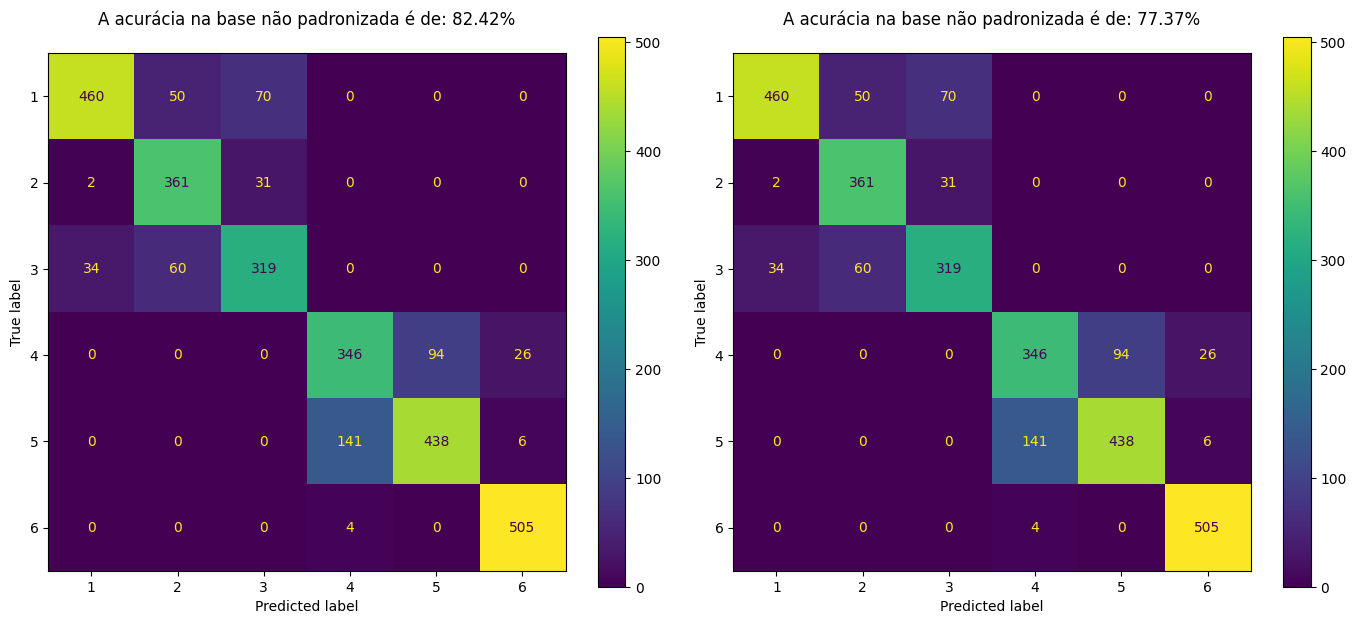

In [31]:
y_pred = clf.predict(pc_teste)
y_pred_pad = clf_pad.predict(pc_teste_pad)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

ax[0].set_title(f'A acurácia na base não padronizada é de: {accuracy_score(y_pred, y_test) *100:.2f}%\n')
ConfusionMatrixDisplay.from_predictions(y_pred, y_test, ax=ax[0])

ax[1].set_title(f'A acurácia na base não padronizada é de: {accuracy_score(y_pred_pad, y_test) *100:.2f}%\n')
ConfusionMatrixDisplay.from_predictions(y_pred, y_test, ax=ax[1])

plt.tight_layout()

plt.show()